### FINAL YEAR PROJECT DATA ANALYSIS


<img src="Society.png" alt="description of the image" width="750" height="750" >

Hii, I'm Roddiyyat.

For my final year university project, I'm building a machine learning model that can predict stroke prevalence in the general population based on a few demographics. I'm doing everything from scratch. From the process of manually collecting the data, inputting it to a spreadsheet, turning it into a csv file, cleaning, analyzing and tidying the data, building our prediction model and then finally deploying it. 
The fun aspect of this is that I'm going to be learning and implementing my learned skills in this project. I'm super excited about this.

### AIM OF PROJECT

Predicting stroke prevalence based on demographics is a valuable endeavor, especially considering the impact it can have on public health. Let's break down the steps we are going to be working through:

1. **Data Collection:**
   - Manually collecting data was time-consuming but it provided me with a deeper understanding of the dataset. 
   - Demographic features includes age, gender, ethnicity, socioeconomic status, and lifestyle factors.

2. **Data Preparation:**
   - Inputting data into a spreadsheet is a good start. The data is organized properly, with each row representing an individual and columns for different features.
   - Converting the spreadsheet to a CSV file is straightforward and will allow us to work with the data programmatically.

3. **Data Cleaning and Tidying:**
   - This step is crucial. We will remove any missing values, outliers, or inconsistencies.
   - Tidy the data by structuring it in a way that facilitates analysis; using tools like pandas in Python for data manipulation.

4. **Exploratory Data Analysis (EDA):**
   - Explore the dataset visually and statistically. Look for patterns, correlations, and potential predictors.
   - Visualizations (histograms, scatter plots, etc.) can reveal insights.

5. **Feature Selection and Engineering:**
   - Decide which features are relevant for predicting stroke prevalence. We will use domain knowledge or consult medical literature.
   - Create new features if needed (e.g., BMI from height and weight).

6. **Model Building:**
   - Choose an appropriate machine learning algorithm (e.g., logistic regression, decision trees, or neural networks).
   - Split our data into training and validation sets.
   - Train our model using the training data and evaluate its performance on the validation set.

7. **Model Deployment:**
   - Once satisfied with our model's performance, deploy it. We can create a web app, API, or integrate it into an existing platform.
   - Ensure that the deployment environment is secure and reliable.



### 1.0 Libaries and Configurations

In [59]:
"""import relevant libraries"""
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display # for markdown function

### 2.0 Data Wrangling

The first step is to analyse, clean and wrangle our data so we can best understand our dataset

### 2.1 Load your dataset into your environment

In [60]:
Stroke_data = pd.read_csv('Stroke Data Collection Template - Filtered Data.csv')

Stroke_data.head()

,Unit Folder Number,Year,Sex,Age,Ave length of Stay,Dead of Alive,Stroke Type,Location,Religion,Number of Kids,...,Hypertensive,Blood pressure Level,Obesity,BMI,Pulse Rate,Medical History,Smoker,Alcohol Intake,Illegal drugs,Diagnosis
0,15112,2021,F,45,12 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Christian,3,...,Yes,210/106mmHg,No,26.65kg/m2,106bpm,"Chest palpation, Menstral irregularities",No,No,Yes,Ischemic stroke with poorly maintained Hyperte...
1,37001,2022,M,65,5 Days,DAMA,Hemispheric Ischaemic Stroke,Suburban,Muslim,-,...,Yes,170/100mmHg,No,-,78bpm,Lepcomatous Patient on DIOS,No,No,No,Ischemic Stroke
2,37001,2022,M,55,4 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Muslim,-,...,Yes,178/100mmHg,No,-,78bpm,Poorly controlled Bloop pressure,No,No,No,Ischemic Stroke complicated by Aphasia
3,358379,2022,F,60,-,Alive,Hemispheric Ischaemic Stroke,Rural,Muslim,-,...,Yes,110/70mmHg,No,-,72bpm,"Parkison disease, Chronic daily headache",No,No,No,Ischemic Stroke
4,396345,2019,M,47,23 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Christian,-,...,No,160/110mmHg,No,-,114bpm,"Constant vomiter, Systemic Hypertension",No,No,Yes,Ischemic Stroke


In [61]:
Stroke_data.columns

Index(['Unit Folder Number', 'Year', 'Sex', 'Age', 'Ave length of Stay',
       'Dead of Alive', 'Stroke Type', 'Location', 'Religion',
       'Number of Kids', 'Marital Status', 'Occupation', 'Family History',
       'Diabetics', 'Hypertensive', 'Blood pressure Level', 'Obesity', 'BMI',
       'Pulse Rate', 'Medical History', 'Smoker', 'Alcohol Intake',
       'Illegal drugs', 'Diagnosis'],
      dtype='object')

### 2.2 Cleaning, Tidying, Wragling

During the data collection process, we had some missing values, so this is our time to clean the data and drop redundant columns

While collecting the data, I inputed units for BMI, PR, BP-Level; and its making cleaning our data harder; but nothing that can't be resolved.

In [62]:
# Step 1: Handling Missing Values
missing_counts = Stroke_data.isnull().sum()
print("Number of missing values in each column:")
print(missing_counts)


# Replace "-" with "N/A" in the entire DataFrame
Stroke_data.replace('-', 'N/A', inplace=True)


# Step 2: Dropping Redundant Columns
columns_to_drop = ['Unit Folder Number','Year'] 
Stroke_data.drop(columns=columns_to_drop, inplace=True)


# Step 3: Data Cleaning and Tidying
# Remove units from specific columns
Stroke_data['BMI'] = Stroke_data['BMI'].str.extract(r'([\d.]+)').astype(float)
Stroke_data['Pulse Rate'] = Stroke_data['Pulse Rate'].str.extract(r'([\d.]+)').astype(float)
Stroke_data['Blood pressure Level'] = Stroke_data['Blood pressure Level'].str.extract(r'([\d.]+)').astype(float)
Stroke_data['Age'] = Stroke_data['Age'].str.extract(r'([\d.]+)').astype(float)


# Save the cleaned dataset to a new CSV file
Stroke_data.to_csv('cleaned_stroke_dataset.csv', index=False)


print("Data cleaning and tidying completed. Cleaned dataset saved as 'cleaned_stroke_dataset.csv'.")


Number of missing values in each column:
Unit Folder Number      0
Year                    0
Sex                     0
Age                     0
Ave length of Stay      0
Dead of Alive           0
Stroke Type             0
Location                0
Religion                0
Number of Kids          0
Marital Status          0
Occupation              0
Family History          1
Diabetics               0
Hypertensive            0
Blood pressure Level    0
Obesity                 0
BMI                     2
Pulse Rate              2
Medical History         1
Smoker                  0
Alcohol Intake          0
Illegal drugs           0
Diagnosis               0
dtype: int64
Data cleaning and tidying completed. Cleaned dataset saved as 'cleaned_stroke_dataset.csv'.


In [63]:
cleaned_stoke_data = pd.read_csv('cleaned_stroke_dataset.csv')

cleaned_stoke_data.head()

,Sex,Age,Ave length of Stay,Dead of Alive,Stroke Type,Location,Religion,Number of Kids,Marital Status,Occupation,...,Hypertensive,Blood pressure Level,Obesity,BMI,Pulse Rate,Medical History,Smoker,Alcohol Intake,Illegal drugs,Diagnosis
0,F,45.0,12 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Christian,3.0,Widoweded,Trader,...,Yes,210.0,No,26.65,106.0,"Chest palpation, Menstral irregularities",No,No,Yes,Ischemic stroke with poorly maintained Hyperte...
1,M,65.0,5 Days,DAMA,Hemispheric Ischaemic Stroke,Suburban,Muslim,NaN,Married,Driver,...,Yes,170.0,No,NaN,78.0,Lepcomatous Patient on DIOS,No,No,No,Ischemic Stroke
2,M,55.0,4 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Muslim,NaN,Married,Civil Servant,...,Yes,178.0,No,NaN,78.0,Poorly controlled Bloop pressure,No,No,No,Ischemic Stroke complicated by Aphasia
3,F,60.0,NaN,Alive,Hemispheric Ischaemic Stroke,Rural,Muslim,NaN,Married,Full House Wife,...,Yes,110.0,No,NaN,72.0,"Parkison disease, Chronic daily headache",No,No,No,Ischemic Stroke
4,M,47.0,23 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Christian,NaN,Married,Entrepreneur,...,No,160.0,No,NaN,114.0,"Constant vomiter, Systemic Hypertension",No,No,Yes,Ischemic Stroke


### 2.3 Check the Information of the New Dataset

In [64]:
cleaned_stoke_data.head()

,Sex,Age,Ave length of Stay,Dead of Alive,Stroke Type,Location,Religion,Number of Kids,Marital Status,Occupation,...,Hypertensive,Blood pressure Level,Obesity,BMI,Pulse Rate,Medical History,Smoker,Alcohol Intake,Illegal drugs,Diagnosis
0,F,45.0,12 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Christian,3.0,Widoweded,Trader,...,Yes,210.0,No,26.65,106.0,"Chest palpation, Menstral irregularities",No,No,Yes,Ischemic stroke with poorly maintained Hyperte...
1,M,65.0,5 Days,DAMA,Hemispheric Ischaemic Stroke,Suburban,Muslim,NaN,Married,Driver,...,Yes,170.0,No,NaN,78.0,Lepcomatous Patient on DIOS,No,No,No,Ischemic Stroke
2,M,55.0,4 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Muslim,NaN,Married,Civil Servant,...,Yes,178.0,No,NaN,78.0,Poorly controlled Bloop pressure,No,No,No,Ischemic Stroke complicated by Aphasia
3,F,60.0,NaN,Alive,Hemispheric Ischaemic Stroke,Rural,Muslim,NaN,Married,Full House Wife,...,Yes,110.0,No,NaN,72.0,"Parkison disease, Chronic daily headache",No,No,No,Ischemic Stroke
4,M,47.0,23 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Christian,NaN,Married,Entrepreneur,...,No,160.0,No,NaN,114.0,"Constant vomiter, Systemic Hypertension",No,No,Yes,Ischemic Stroke


In [65]:
cleaned_stoke_data.describe()

,Age,Number of Kids,Blood pressure Level,BMI,Pulse Rate
count,213.000000,44.000000,214.000000,16.000000,208.000000
mean,63.244131,4.318182,148.556075,31.652500,85.163462
std,12.978448,2.826558,29.589748,7.215223,16.082883
min,29.000000,1.000000,90.000000,15.770000,55.000000
25%,55.000000,3.000000,130.000000,26.237500,73.750000
50%,65.000000,3.000000,140.000000,33.350000,84.000000
75%,74.000000,5.250000,160.000000,37.625000,92.500000
max,93.000000,14.000000,240.000000,41.000000,140.000000


In [66]:
cleaned_stoke_data.values

array([['F', 45.0, '12 Days', ..., 'No', 'Yes',
        'Ischemic stroke with poorly maintained Hypertension'],
       ['M', 65.0, '5 Days', ..., 'No', 'No', 'Ischemic Stroke'],
       ['M', 55.0, '4 Days', ..., 'No', 'No',
        'Ischemic Stroke complicated by Aphasia'],
       ...,
       ['F', 63.0, '10 Days', ..., 'No', 'No', 'Ischemic Stroke'],
       ['M', 30.0, '11 Days', ..., 'No', 'No', 'Ischemic Stroke'],
       ['F', 65.0, '1 Day', ..., 'No', 'No', 'Ischemic Stroke']],
      dtype=object)

In [67]:
cleaned_stoke_data.shape

(214, 22)

In [68]:
cleaned_stoke_data.index

RangeIndex(start=0, stop=214, step=1)

In [69]:
cleaned_stoke_data.columns

Index(['Sex', 'Age', 'Ave length of Stay', 'Dead of Alive', 'Stroke Type',
       'Location', 'Religion', 'Number of Kids', 'Marital Status',
       'Occupation', 'Family History', 'Diabetics', 'Hypertensive',
       'Blood pressure Level', 'Obesity', 'BMI', 'Pulse Rate',
       'Medical History', 'Smoker', 'Alcohol Intake', 'Illegal drugs',
       'Diagnosis'],
      dtype='object')

In [70]:
cleaned_stoke_data.dropna()

,Sex,Age,Ave length of Stay,Dead of Alive,Stroke Type,Location,Religion,Number of Kids,Marital Status,Occupation,...,Hypertensive,Blood pressure Level,Obesity,BMI,Pulse Rate,Medical History,Smoker,Alcohol Intake,Illegal drugs,Diagnosis
0,F,45.0,12 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Christian,3.0,Widoweded,Trader,...,Yes,210.0,No,26.65,106.0,"Chest palpation, Menstral irregularities",No,No,Yes,Ischemic stroke with poorly maintained Hyperte...
16,M,75.0,14 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Muslim,2.0,Married,Retired,...,Yes,150.0,Yes,29.96,79.0,Had a Previous Case of Stroke Emergency,No,No,Yes,Ischemic Stroke
93,F,80.0,24 Days,Alive,Right Hemispheric Ischaemic Stroke,Suburban,Muslim,11.0,Married,Retired,...,Yes,140.0,Yes,35.00,108.0,"Systemic Hypertension, Lumbar Spondylosis",No,No,No,Ischemic Stroke
120,F,57.0,19 Days,Alive,Left Hemispheric Ischaemic Stroke,Suburban,Christian,4.0,Married,Trader,...,Yes,130.0,Yes,37.50,82.0,"Had a Previous Case of Stroke Emergency, Syste...",No,No,No,Ischemic Stroke sepsis focus in the chest on B...
208,F,81.0,7 Days,Alive,Hemispheric Ischaemic Stroke,Urban,Christian,1.0,Widoweded,Civil Servant,...,Yes,130.0,No,25.00,82.0,Had a Previous Case of Stroke Emergency,Yes,Yes,Yes,Ischemic Stroke


In [71]:
cleaned_stoke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   214 non-null    object 
 1   Age                   213 non-null    float64
 2   Ave length of Stay    212 non-null    object 
 3   Dead of Alive         214 non-null    object 
 4   Stroke Type           214 non-null    object 
 5   Location              214 non-null    object 
 6   Religion              214 non-null    object 
 7   Number of Kids        44 non-null     float64
 8   Marital Status        214 non-null    object 
 9   Occupation            213 non-null    object 
 10  Family History        213 non-null    object 
 11  Diabetics             213 non-null    object 
 12  Hypertensive          213 non-null    object 
 13  Blood pressure Level  214 non-null    float64
 14  Obesity               213 non-null    object 
 15  BMI                   1

In [72]:
cleaned_stoke_data.tail()

,Sex,Age,Ave length of Stay,Dead of Alive,Stroke Type,Location,Religion,Number of Kids,Marital Status,Occupation,...,Hypertensive,Blood pressure Level,Obesity,BMI,Pulse Rate,Medical History,Smoker,Alcohol Intake,Illegal drugs,Diagnosis
209,M,65.0,4 days,Alive,Hemispheric Ischaemic Stroke,Rural,Muslim,1.0,Married,Lawyer,...,Yes,148.0,No,NaN,65.0,Systemic Hypertension,No,No,No,Ischemic Stroke
210,M,65.0,4 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Muslim,NaN,Married,Driver,...,No,150.0,No,NaN,113.0,NaN,No,No,No,Ischemic Stroke
211,F,63.0,10 Days,Alive,Hemispheric Ischaemic Stroke,Rural,Christian,NaN,Widoweded,Trader,...,Yes,120.0,No,NaN,73.0,Systemic Hypertension,No,No,No,Ischemic Stroke
212,M,30.0,11 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Muslim,NaN,Married,Entrepreneur,...,Yes,110.0,No,NaN,100.0,NaN,No,No,No,Ischemic Stroke
213,F,65.0,1 Day,Alive,Hemispheric Ischaemic Stroke,Suburban,Muslim,NaN,Married,Trader,...,No,170.0,No,NaN,97.0,NaN,No,No,No,Ischemic Stroke


### 3.0 Exploratory Data Analysis(EDA)
Let’s dive into visual exploration of your stroke dataset. We’ll create relevant plots to gain insights into the distribution of features.

3.1 Histograms for Numeric Features (e.g., Age, BMI):Histograms help us understand the distribution of continuous numeric variables.

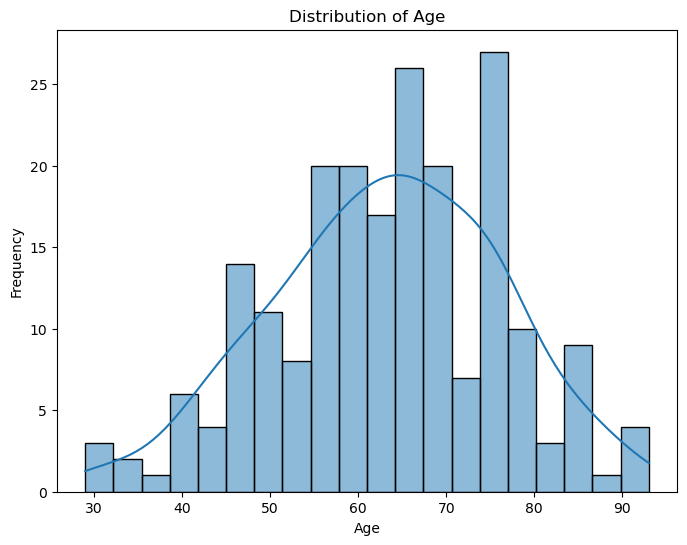

In [73]:
# Example: Histogram for Age

plt.figure(figsize=(8, 6))
sns.histplot(cleaned_stoke_data['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

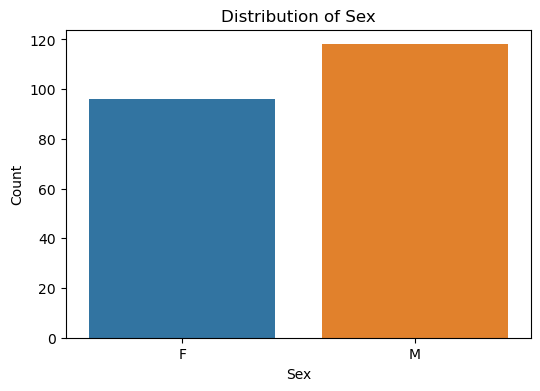

In [74]:
# Example: Bar plot for Sex

plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=cleaned_stoke_data)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

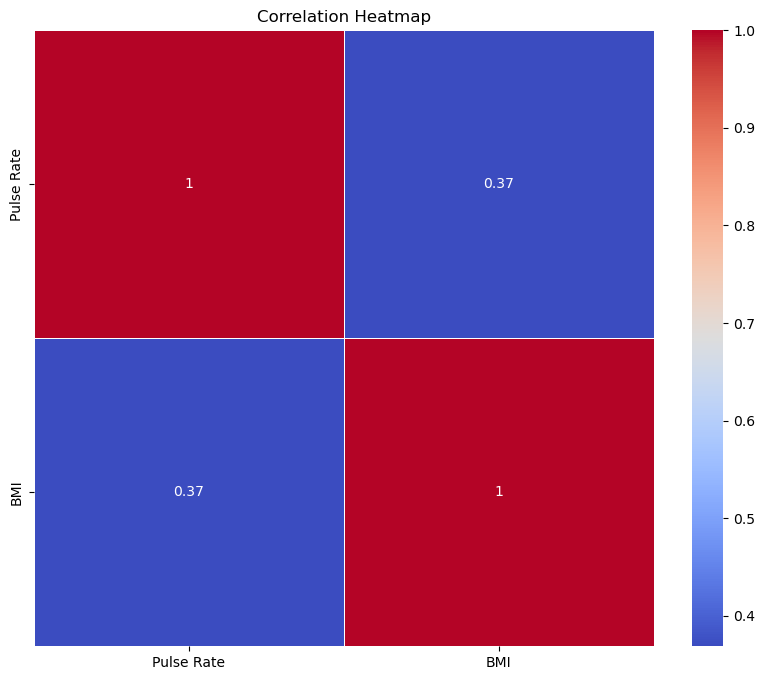

In [75]:
# Identify the column with non-numeric values (e.g., 'pulse rate')
problematic_column = 'Pulse Rate'

# Replace non-numeric values (e.g., 'F') with NaN
cleaned_stoke_data[problematic_column] = cleaned_stoke_data[problematic_column].replace('F', float('nan'))

# Create a heatmap (example using 'pulse_rate' and 'bmi')
plt.figure(figsize=(10, 8))
sns.heatmap(cleaned_stoke_data[['Pulse Rate', 'BMI']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

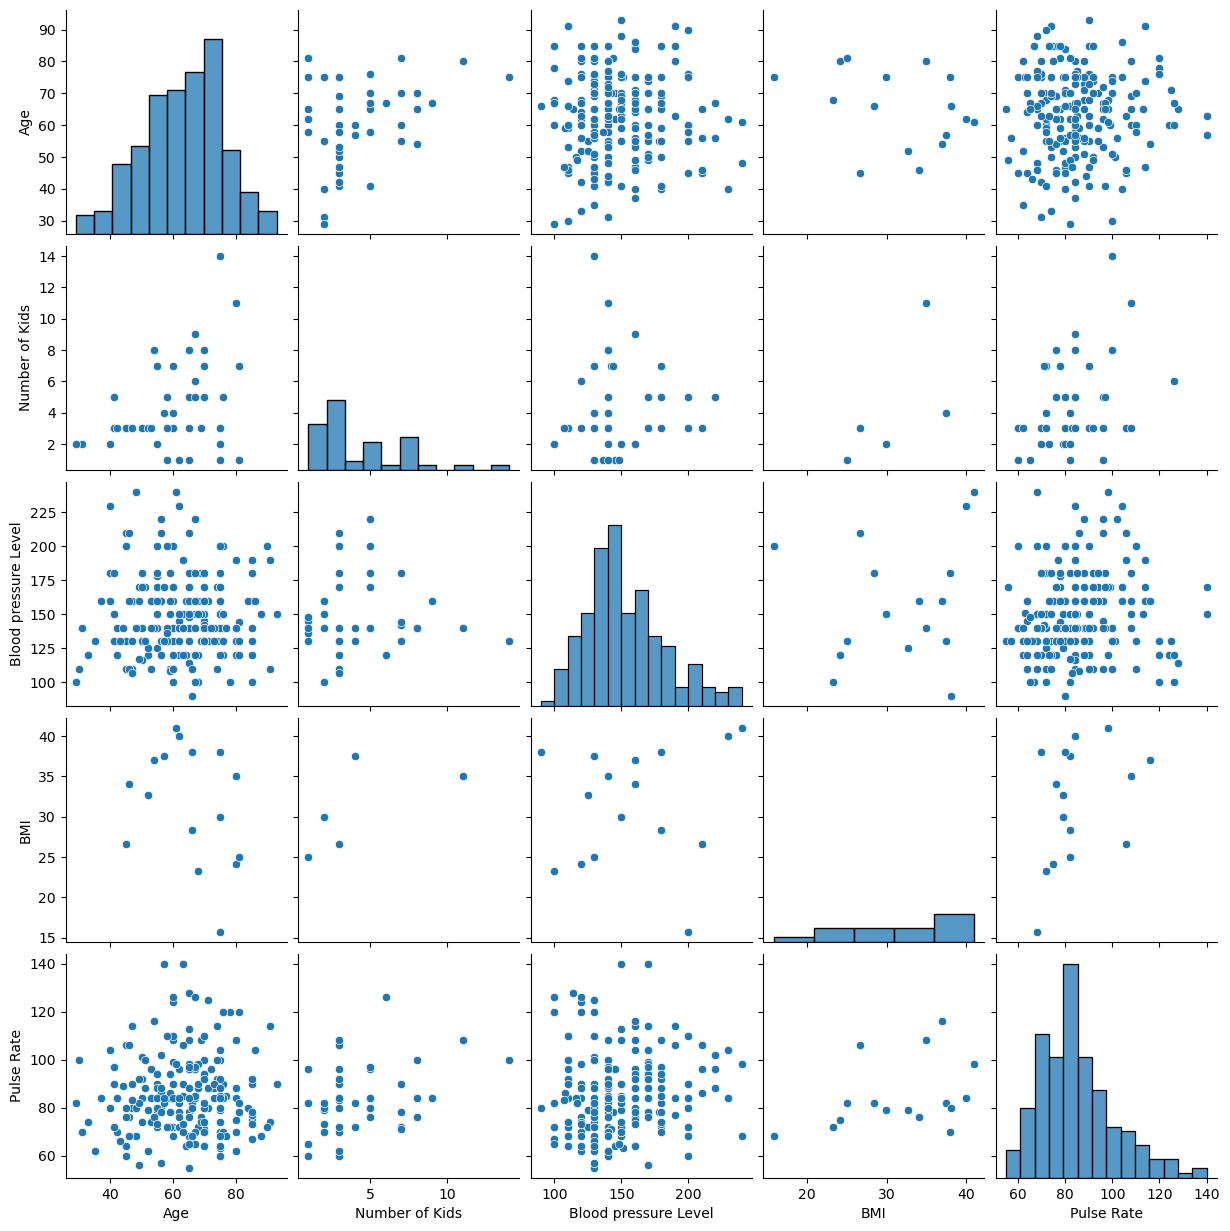

In [76]:
# Pairplot correlate all numerical variable in our dataset to help us understand the data


sns.pairplot(cleaned_stoke_data)

### 3.1 Bivariate Analysis in Python

This aims to identify any concurrent relations, typically beyond simple correlation analysis.




Let’s delve into the correlations and risk factors related to stroke based on your dataset. We’ll explore how various factors impact the likelihood of stroke occurrence. Here are the key areas we’ll cover:

1. **Hypertension (High Blood Pressure) and Stroke:**
   - High blood pressure is a significant risk factor for stroke. Let's visualize how blood pressure levels correlate with stroke occurrence.

2. **Diabetes and Stroke:**
   - Diabetes increases the chance of having a stroke. We'll examine the relationship between diabetes and stroke using visualizations.

3. **Smoking and Stroke:**
   - Smoking significantly impacts stroke risk. We'll create visualizations to understand this association.

4. **Occupation and Stroke:**
   - Occupational variables can play a role in stroke risk. We'll explore how job stress, extreme temperatures, long working hours, and shift work correlate with stroke occurrence.

5. Location, Marital Status, and Lifestyle Factors 


c:\Users\Rodiyat\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Rodiyat\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<Axes: xlabel='Age', ylabel='count'>

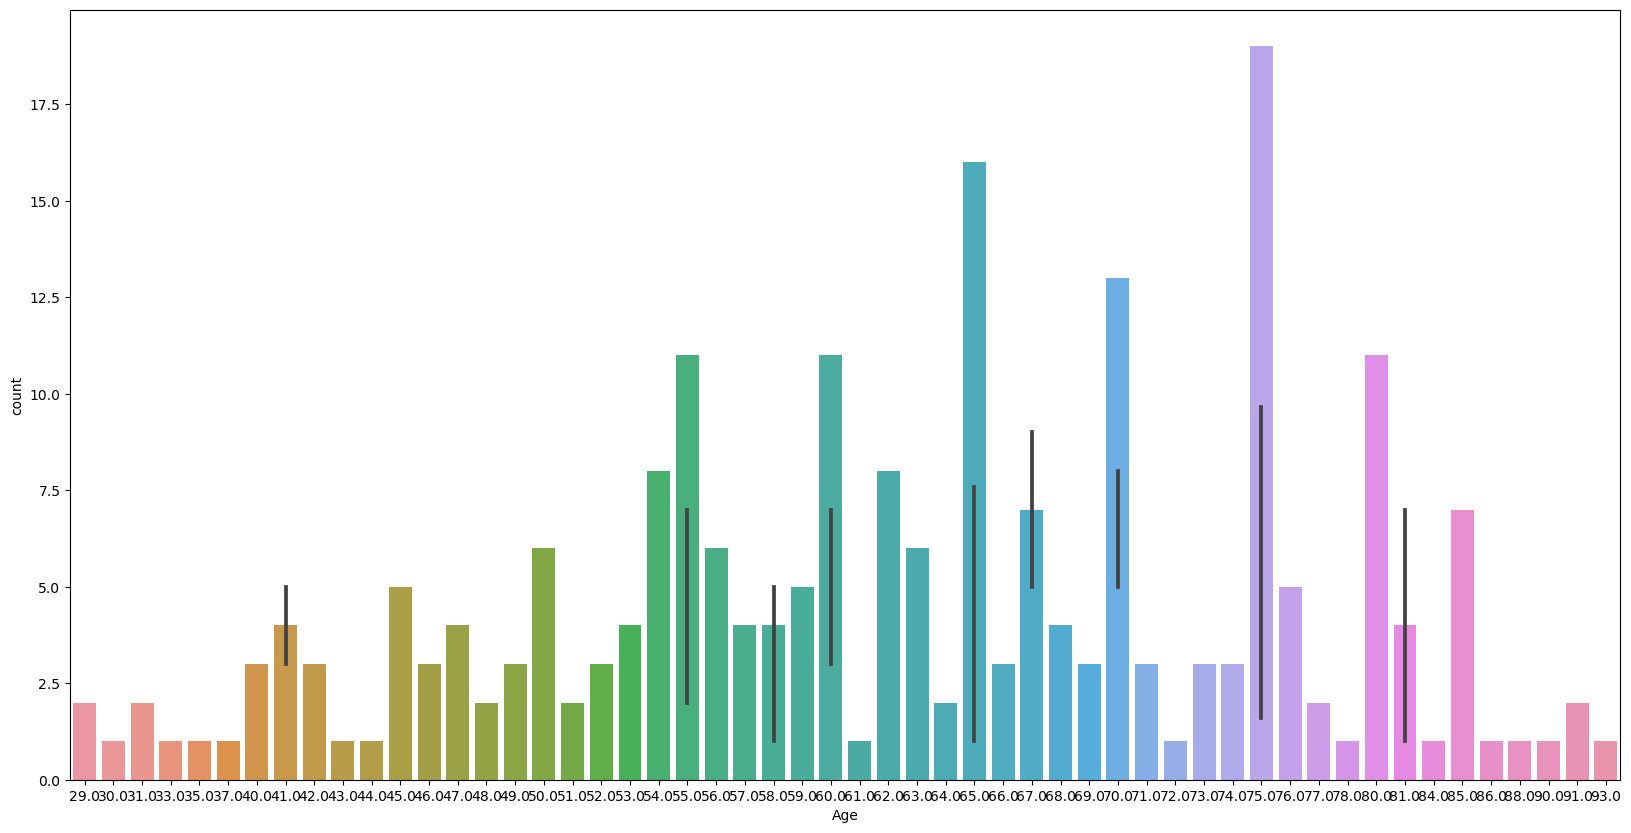

In [77]:
# Categorical plot for aggregates of continuous variables

#Plots used are: bar plot and count plot

plt.figure(figsize=(20, 10))
sns.barplot(x='Age',y='Number of Kids',data=cleaned_stoke_data)
sns.countplot(x='Age',data=cleaned_stoke_data)


<Axes: xlabel='Age', ylabel='BMI'>

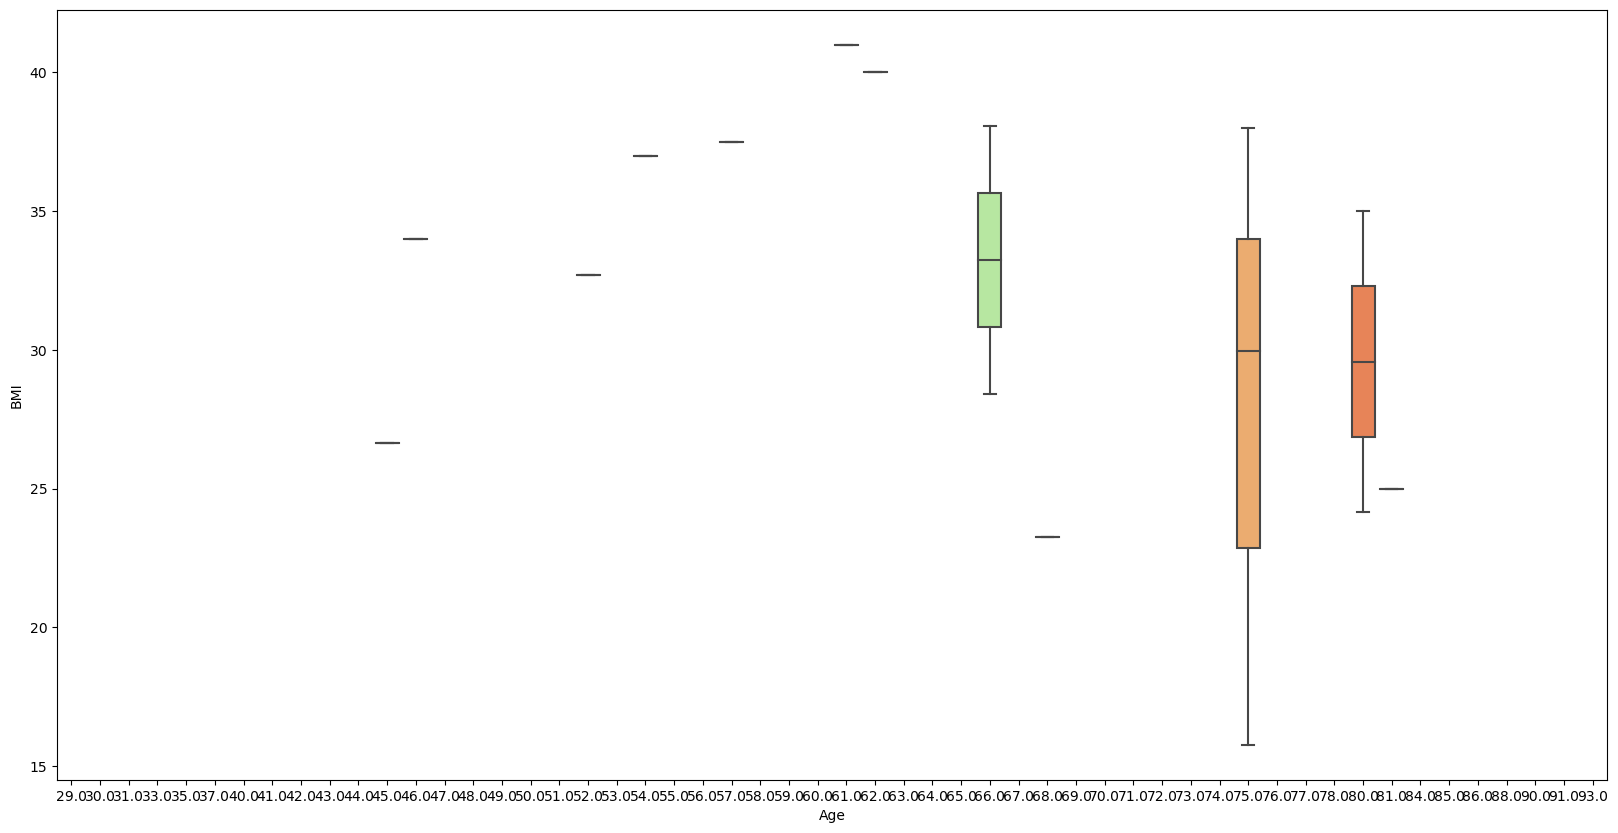

In [78]:
# The Box plot shows the estimated probability density function of the BMI. It helps us understand the distribution of BMI value across the dataset.


plt.figure(figsize=(20, 10))
sns.boxplot(x='Age',y='BMI',data=cleaned_stoke_data,palette='rainbow')


<Axes: xlabel='Blood pressure Level', ylabel='Ave length of Stay'>

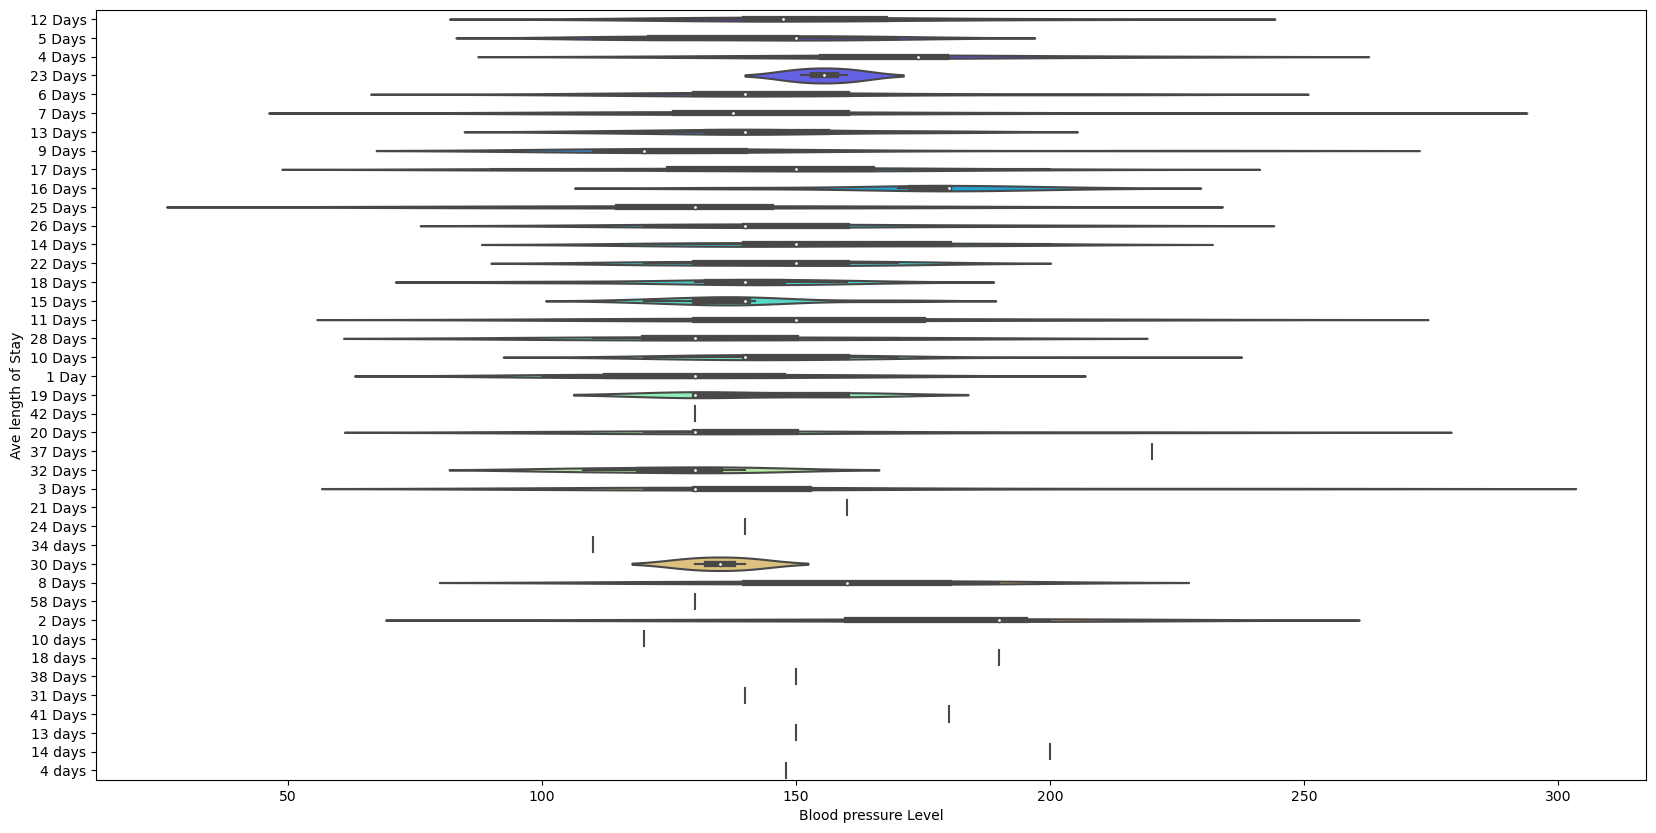

In [79]:
# The violin plot displays the distribution of blood pressure values over patient length of stay at the hospital


plt.figure(figsize=(20, 10))
sns.violinplot(x="Blood pressure Level", y="Ave length of Stay", data=cleaned_stoke_data,palette='rainbow')


<Axes: xlabel='Marital Status', ylabel='Blood pressure Level'>

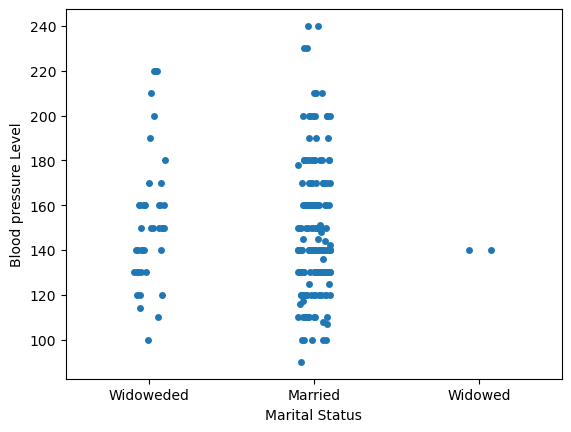

In [80]:
# The stripplot shows the blood pressure level of patients based on their marital status


sns.stripplot(x="Marital Status", y="Blood pressure Level", data=cleaned_stoke_data)


(0.0, 144.25)

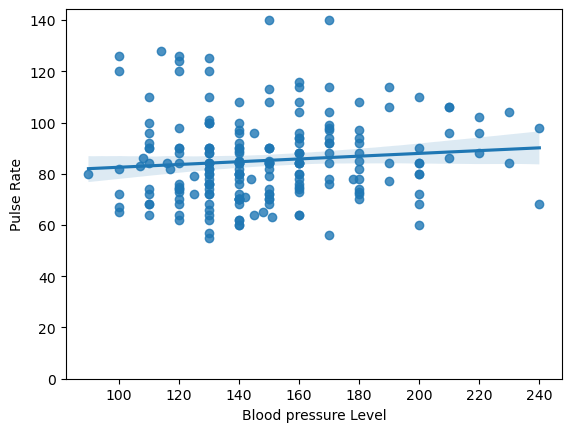

In [81]:
# The plot below shows the correlation between the bp-level and the pulse rate



sns.regplot(x='Blood pressure Level',y='Pulse Rate',data=cleaned_stoke_data)
plt.ylim(0,)


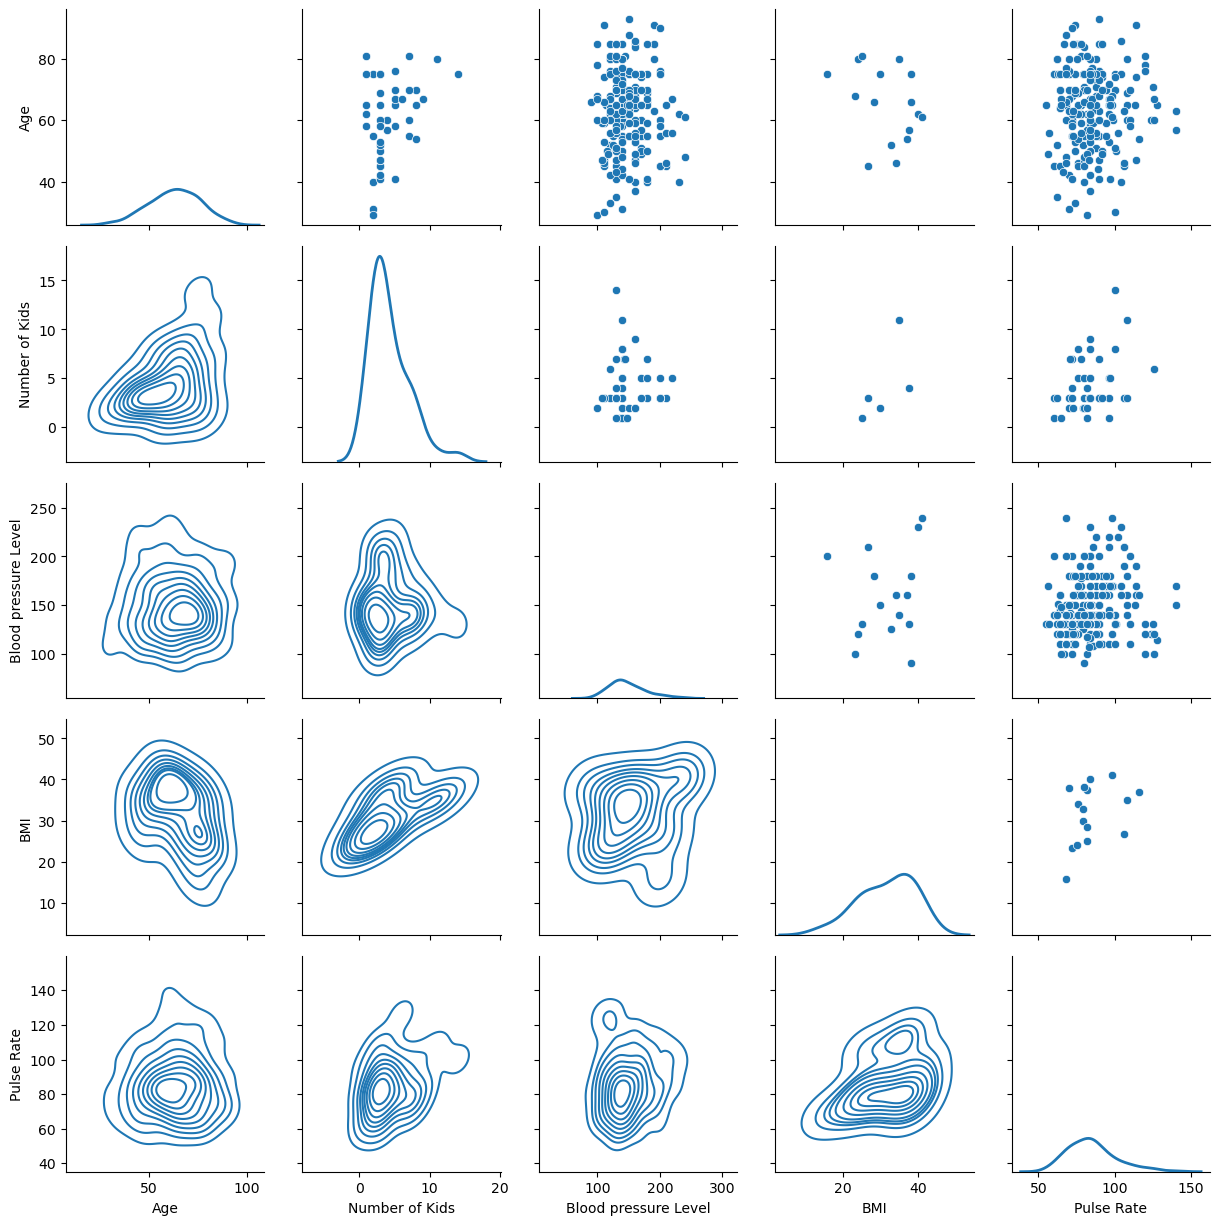

In [82]:
g = sns.PairGrid(cleaned_stoke_data)

g = g.map_upper(sns.scatterplot)

g = g.map_lower(sns.kdeplot, colors="C0")

g = g.map_diag(sns.kdeplot, lw=2)

### Here are the visualizations exploring the variables in our dataset:

1. Correlation Heatmap
Explanation: This heatmap shows the correlations between numerical variables such as Age, Average Length of Stay, Blood Pressure Level, BMI, and Pulse Rate. Strong correlations can be identified by darker shades. This visualization helps in understanding how different variables are related to each other and which variables might be redundant.

2. Age Distribution by Stroke Type
Explanation: This boxplot displays the age distribution across different stroke types. It highlights the median age, interquartile range, and potential outliers for each stroke type. This visualization is useful to identify if certain stroke types are more prevalent in specific age groups.

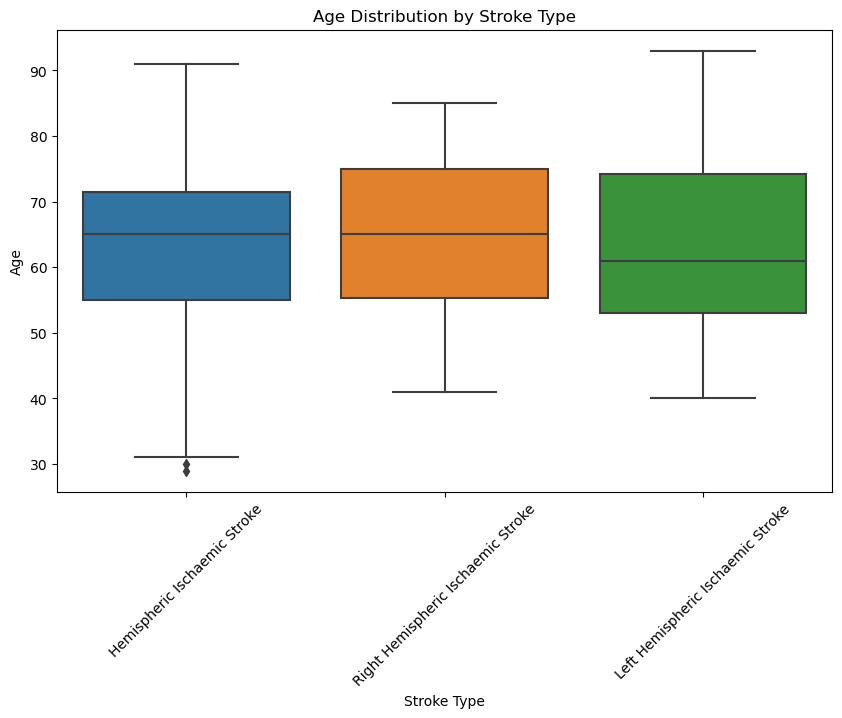

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_stoke_data, x='Stroke Type', y='Age')
plt.title('Age Distribution by Stroke Type')
plt.xticks(rotation=45)
plt.show()


3. Average Length of Stay by Stroke Type
Explanation: This boxplot shows the average length of hospital stay for different stroke types. It provides insights into which stroke types are associated with longer or shorter hospital stays. This information can be valuable for healthcare planning and resource allocation.

4. BMI Distribution by Hypertensive Status
Explanation: This boxplot compares the BMI distribution between hypertensive and non-hypertensive patients. It helps in understanding if there is a significant difference in BMI based on hypertensive status. Higher BMI could be associated with hypertension, as suggested by medical literature.

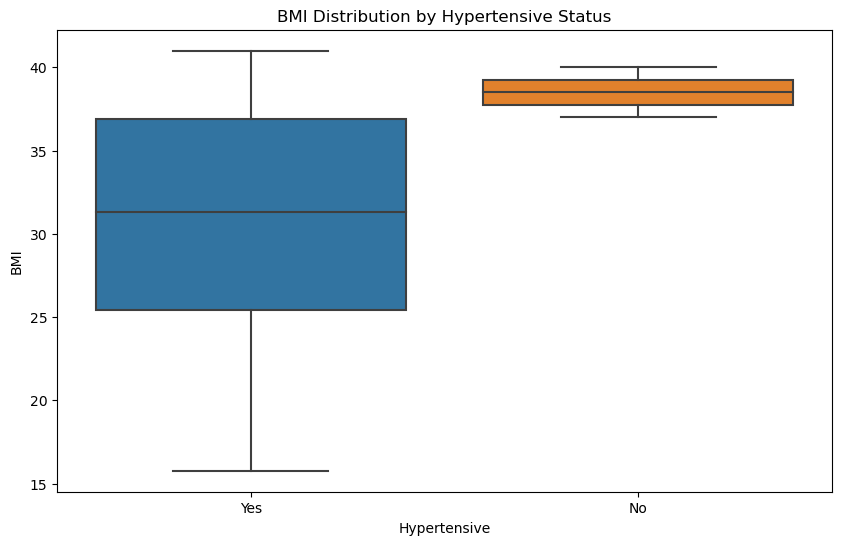

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_stoke_data, x='Hypertensive', y='BMI')
plt.title('BMI Distribution by Hypertensive Status')
plt.show()


5. Stroke Type Distribution
Explanation: This count plot shows the distribution of different stroke types in the dataset. It helps in understanding the prevalence of each stroke type in the collected data. For example, Hemispheric Ischaemic Stroke might be the most common stroke type observed in the dataset.

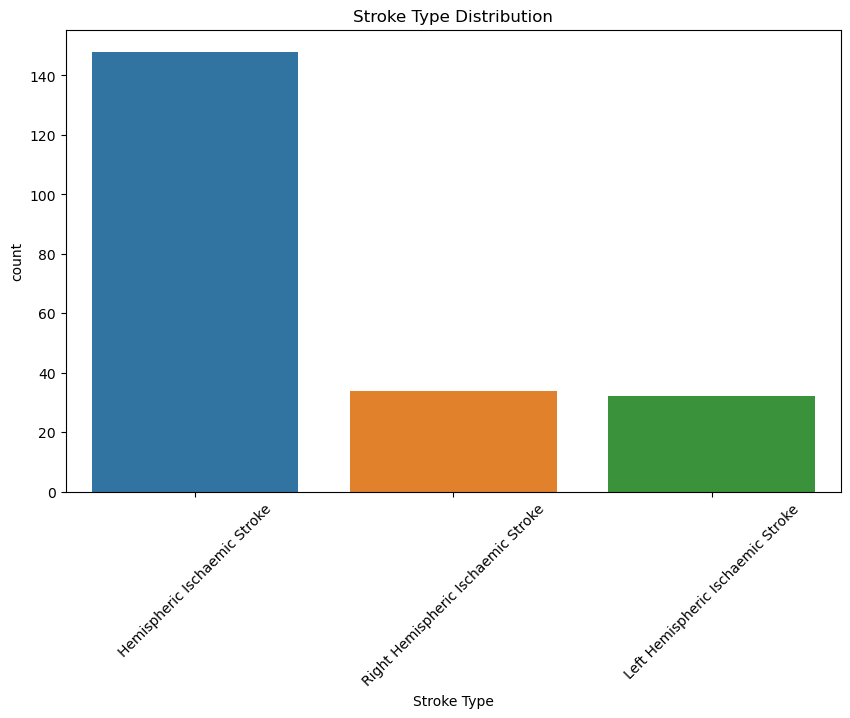

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_stoke_data, x='Stroke Type')
plt.title('Stroke Type Distribution')
plt.xticks(rotation=45)
plt.show()


6. Smoking Status Distribution
Explanation: This count plot displays the distribution of smoking status among the patients. It shows the number of smokers and non-smokers, which can be correlated with other health conditions and stroke prevalence.

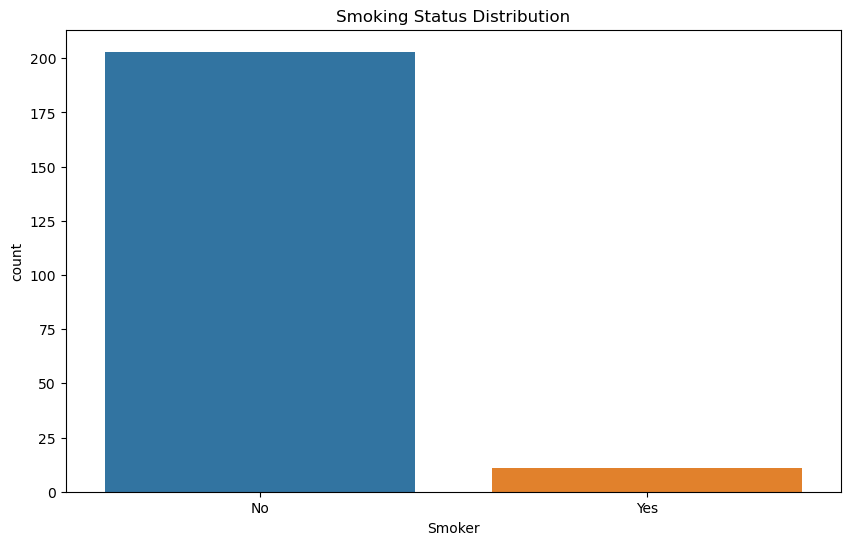

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_stoke_data, x='Smoker')
plt.title('Smoking Status Distribution')
plt.show()


7. Alcohol Intake Distribution
Explanation: This count plot illustrates the distribution of alcohol intake among the patients. Understanding the prevalence of alcohol consumption can help in identifying its impact on stroke risk and other health conditions.

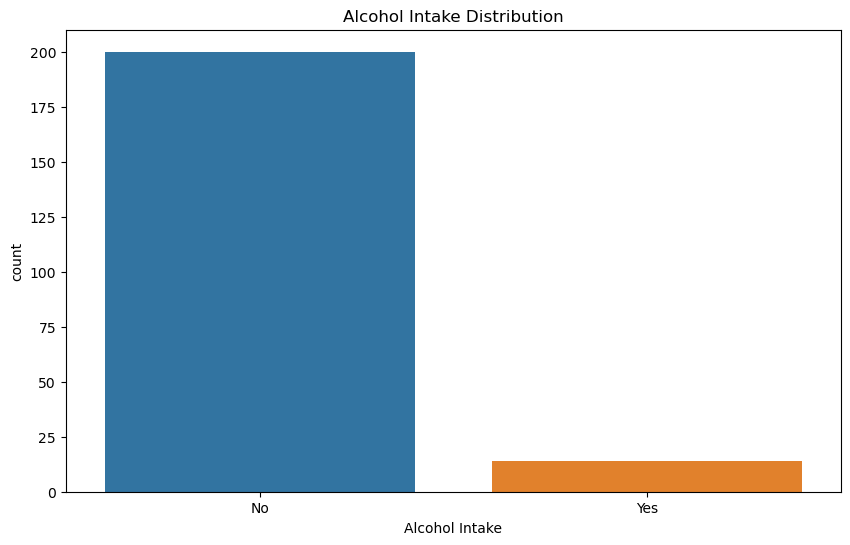

In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_stoke_data, x='Alcohol Intake')
plt.title('Alcohol Intake Distribution')
plt.show()


8. Age vs. Blood Pressure Level
Explanation: This scatter plot shows the relationship between Age and Blood Pressure Level, with hypertensive status highlighted. It helps in visualizing how blood pressure varies with age and whether hypertensive patients show different patterns compared to non-hypertensive patients.

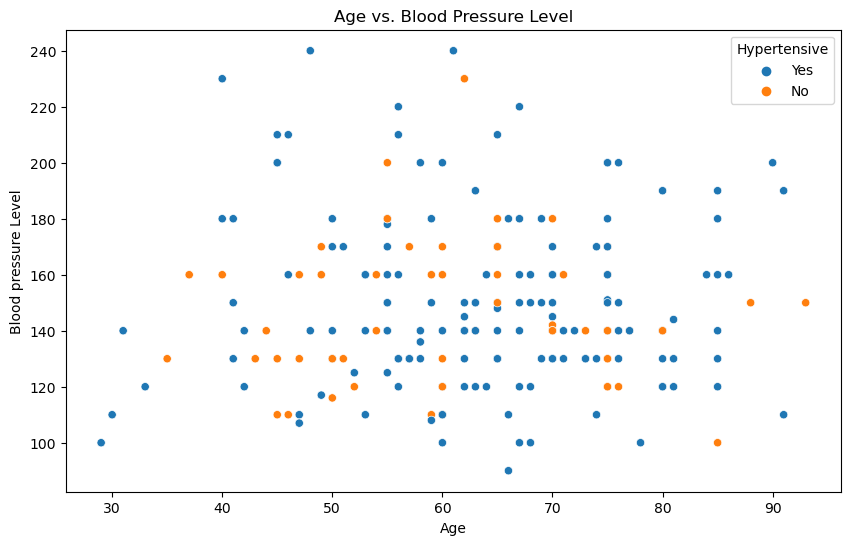

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_stoke_data, x='Age', y='Blood pressure Level', hue='Hypertensive')
plt.title('Age vs. Blood Pressure Level')
plt.show()


9. Age vs. BMI
Explanation: This scatter plot displays the relationship between Age and BMI, with hypertensive status indicated by different colors. It provides insights into how BMI changes with age and how it might be associated with hypertension.

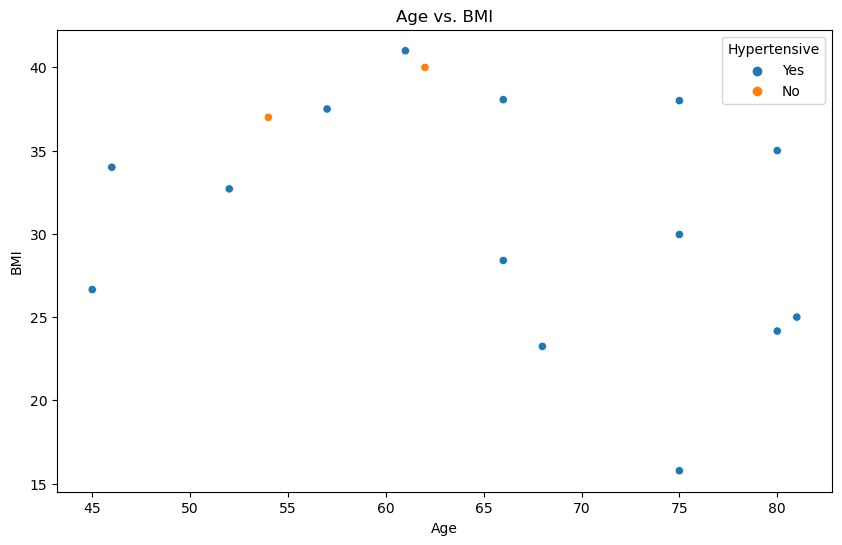

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_stoke_data, x='Age', y='BMI', hue='Hypertensive')
plt.title('Age vs. BMI')
plt.show()


### Model Building and Deployment

### 1.1 Load Data

In [90]:
import pandas as pd

# Load the stroke patient data
stroke_data = pd.read_csv(r'C:\Users\Rodiyat\Downloads\cleaned_stroke_dataset.csv')

# Load the healthy individuals data from the Excel file
healthy_data = pd.read_excel(r'C:\Users\Rodiyat\Downloads\Stroke ML Testing Data Survey .xlsx')

# Display the first few rows of each dataset to understand their structure
print("Stroke Data:")
print(stroke_data.head())

print("\nHealthy Individuals Data:")
print(healthy_data.head())



Stroke Data:
  Sex   Age Ave length of Stay Dead of Alive                   Stroke Type  \
0   F  45.0            12 Days         Alive  Hemispheric Ischaemic Stroke   
1   M  65.0             5 Days          DAMA  Hemispheric Ischaemic Stroke   
2   M  55.0             4 Days         Alive  Hemispheric Ischaemic Stroke   
3   F  60.0                NaN         Alive  Hemispheric Ischaemic Stroke   
4   M  47.0            23 Days         Alive  Hemispheric Ischaemic Stroke   

   Location   Religion  Number of Kids Marital Status       Occupation  ...  \
0  Suburban  Christian             3.0      Widoweded           Trader  ...   
1  Suburban     Muslim             NaN        Married           Driver  ...   
2  Suburban     Muslim             NaN        Married    Civil Servant  ...   
3     Rural     Muslim             NaN        Married  Full House Wife  ...   
4  Suburban  Christian             NaN        Married     Entrepreneur  ...   

  Hypertensive Blood pressure Level Obesity

### 1.2 Preprocess Data

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Add a target column to both datasets
stroke_data['Stroke'] = 1
healthy_data['Stroke'] = 0

# Combine the datasets
data = pd.concat([stroke_data, healthy_data], ignore_index=True)

# Define features and target variable
X = data.drop('Stroke', axis=1)
y = data['Stroke']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Apply preprocessing to the data
X_preprocessed = preprocessor.fit_transform(X)

# Display the shape of the preprocessed data
print("Shape of preprocessed data:", X_preprocessed.shape)


Shape of preprocessed data: (268, 398)


c:\Users\Rodiyat\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['BMI(/m2)' 'Any other Parameter']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


### Step 2: Model Training

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0


In [97]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X_preprocessed, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Cross-Validation Accuracy: {scores.mean()}')


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0


In [98]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Validate the model on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')
print(f'Validation Precision: {val_precision}')
print(f'Validation Recall: {val_recall}')
print(f'Validation F1 Score: {val_f1}')
print(f'Validation ROC AUC Score: {val_roc_auc}')


Validation Accuracy: 1.0
Validation Precision: 1.0
Validation Recall: 1.0
Validation F1 Score: 1.0
Validation ROC AUC Score: 1.0


Step 3: Save the Model

In [93]:
import pickle

# Save the model to disk
with open('stroke_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the preprocessor to disk
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)


### Step 4: Model Deployment with Flask

In [94]:
import os
from flask import Flask, request, jsonify
import pickle
import numpy as np

# Initialize Flask app
app = Flask(__name__)

# Load the model and preprocessor from disk
model = pickle.load(open('stroke_model.pkl', 'rb'))
preprocessor = pickle.load(open('preprocessor.pkl', 'rb'))

@app.route('/predict', methods=['POST'])
def predict():
    # Get data from the POST request
    data = request.get_json(force=True)
    # Convert data to numpy array and reshape for the model
    input_data = np.array(list(data.values())).reshape(1, -1)
    # Preprocess the input data
    input_data_preprocessed = preprocessor.transform(input_data)
    # Make prediction
    prediction = model.predict(input_data_preprocessed)
    # Return prediction as JSON
    return jsonify({'prediction': int(prediction[0])})

# Function to run the Flask app
def run_app():
    app.run(debug=True, use_reloader=False)

# Run the Flask app in a separate thread to keep the notebook kernel free
import threading
threading.Thread(target=run_app).start()


In [ ]:
from flask import Flask, request, jsonify, render_template
import pickle
import numpy as np

app = Flask(__name__)

# Load the model and preprocessor from disk
model = pickle.load(open('stroke_model.pkl', 'rb'))
preprocessor = pickle.load(open('preprocessor.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Get form data
    form_data = request.form.to_dict()
    # Convert form data to numpy array and reshape for the model
    input_data = np.array(list(form_data.values())).reshape(1, -1)
    # Preprocess the input data
    input_data_preprocessed = preprocessor.transform(input_data)
    # Make prediction
    prediction = model.predict(input_data_preprocessed)
    # Render the result page with the prediction
    return render_template('result.html', prediction=int(prediction[0]))

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [30/Jul/2024 01:30:41] "GET / HTTP/1.1" 404 -


 * Serving Flask app '__main__'
